In [1]:
# from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage.measure
import pandas as pd

In [3]:
def open_array(c):
    color = "ubgrn12"
    index = color.find(c)+1
    im = Image.open("data/landsat-8/024031/20170805_20170812_01_T1/LC08_L1TP_024031_20170805_20170812_01_T1_B{}.TIF".format(index))
    return np.array(im)

# How noisy are the images?

In [4]:
def show_pool(image,pool_size, method=np.max):
    reduced = skimage.measure.block_reduce(image, (pool_size,pool_size), np.max)
    plt.figure(dpi=200)
    min_lim = int(6000/pool_size)
    max_lim = int(6100/pool_size)
    plt.imshow(reduced[min_lim:max_lim, min_lim:max_lim], cmap="Blues_r");
    
    dpi = 400
    delta = int(dpi/2)
    plt.figure(dpi=dpi)
    
    center = [int(s/2) for s in reduced.shape]
    fft = np.fft.fft(reduced)
    plt.imshow(fft.astype(float)[center[0]-delta:center[0]+delta, center[1]-delta:center[0]+delta], cmap="binary")

In [6]:
blue_im = open_array('u')

In [ ]:
show_pool(blue_im, 1)

In [ ]:
show_pool(blue_im, 2)

In [ ]:
show_pool(blue_im, 3)

# Alignment

In [7]:
landsat_dir = "data/landsat-8/024031/"
timestamps = [ d for d in os.listdir(landsat_dir) if ".tar.gz" not in d and d[-1] == "1"]

In [8]:
def my_grep( search ):
    out = []
    for ts_dir in timestamps:
        path = landsat_dir + ts_dir + "/"
        print(path)
        for line in open(next(path+mtl for mtl in os.listdir(path) if "MTL" in mtl)):
            if search in line:
                out.append(line.strip().split()[-1])
                print(line, end="")
    return out

def pivot(list_, n=2):
    input_length = len(list_)
    if input_length % n != 0:
        raise ValueError("list cannot be evenly divided")
    output_length = input_length // n
    output = []
    for row in range(output_length):
        try:
            output.append([list_[row*n+col] for col in range(n)])
        except IndexError:
            print(row)
    return output

In [9]:
corner_labels = ["CORNER_UL_LAT_PRODUCT",
                 "CORNER_UL_LON_PRODUCT",
                 "CORNER_UR_LAT_PRODUCT",
                 "CORNER_UR_LON_PRODUCT",
                 "CORNER_LL_LAT_PRODUCT",
                 "CORNER_LL_LON_PRODUCT",
                 "CORNER_LR_LAT_PRODUCT",
                 "CORNER_LR_LON_PRODUCT",
                 "CORNER_UL_PROJECTION_X_PRODUCT",
                 "CORNER_UL_PROJECTION_Y_PRODUCT",
                 "CORNER_UR_PROJECTION_X_PRODUCT",
                 "CORNER_UR_PROJECTION_Y_PRODUCT",
                 "CORNER_LL_PROJECTION_X_PRODUCT",
                 "CORNER_LL_PROJECTION_Y_PRODUCT",
                 "CORNER_LR_PROJECTION_X_PRODUCT",
                 "CORNER_LR_PROJECTION_Y_PRODUCT"]

In [10]:
%%capture
corners = pivot(my_grep("CORNER"), 16)
corners = pd.DataFrame(corners)
corners = corners.astype(float)
corners.rename(lambda x: corner_labels[x], axis=1, inplace=True)

In [11]:
corners

,CORNER_UL_LAT_PRODUCT,CORNER_UL_LON_PRODUCT,CORNER_UR_LAT_PRODUCT,CORNER_UR_LON_PRODUCT,CORNER_LL_LAT_PRODUCT,CORNER_LL_LON_PRODUCT,CORNER_LR_LAT_PRODUCT,CORNER_LR_LON_PRODUCT,CORNER_UL_PROJECTION_X_PRODUCT,CORNER_UL_PROJECTION_Y_PRODUCT,CORNER_UR_PROJECTION_X_PRODUCT,CORNER_UR_PROJECTION_Y_PRODUCT,CORNER_LL_PROJECTION_X_PRODUCT,CORNER_LL_PROJECTION_Y_PRODUCT,CORNER_LR_PROJECTION_X_PRODUCT,CORNER_LR_PROJECTION_Y_PRODUCT
0,42.79402,-91.36748,42.86803,-88.46419,40.62762,-91.22298,40.69623,-88.41559,142800.0,4747200.0,380400.0,4747200.0,142800.0,4506000.0,380400.0,4506000.0
1,42.79458,-91.35285,42.86827,-88.44583,40.62813,-91.20883,40.69645,-88.39784,144000.0,4747200.0,381900.0,4747200.0,144000.0,4506000.0,381900.0,4506000.0
2,42.79402,-91.36748,42.86803,-88.46419,40.62762,-91.22298,40.69623,-88.41559,142800.0,4747200.0,380400.0,4747200.0,142800.0,4506000.0,380400.0,4506000.0
3,42.79346,-91.38211,42.86784,-88.47888,40.62710,-91.23713,40.69605,-88.42979,141600.0,4747200.0,379200.0,4747200.0,141600.0,4506000.0,379200.0,4506000.0
4,42.79416,-91.36382,42.86813,-88.45685,40.62774,-91.21944,40.69632,-88.40849,143100.0,4747200.0,381000.0,4747200.0,143100.0,4506000.0,381000.0,4506000.0
5,42.79444,-91.35651,42.86822,-88.44951,40.62800,-91.21237,40.69640,-88.40139,143700.0,4747200.0,381600.0,4747200.0,143700.0,4506000.0,381600.0,4506000.0
6,42.79416,-91.36382,42.86808,-88.46052,40.62774,-91.21944,40.69627,-88.41204,143100.0,4747200.0,380700.0,4747200.0,143100.0,4506000.0,380700.0,4506000.0
7,42.79458,-91.35285,42.86827,-88.44583,40.62813,-91.20883,40.69645,-88.39784,144000.0,4747200.0,381900.0,4747200.0,144000.0,4506000.0,381900.0,4506000.0
8,42.79346,-91.38211,42.86789,-88.47521,40.62710,-91.23713,40.69610,-88.42624,141600.0,4747200.0,379500.0,4747200.0,141600.0,4506000.0,379500.0,4506000.0
9,42.79430,-91.36017,42.86813,-88.45685,40.62787,-91.21590,40.69632,-88.40849,143400.0,4747200.0,381000.0,4747200.0,143400.0,4506000.0,381000.0,4506000.0


In [12]:
for col in corners.columns:
    print(col, len(set(corners[col])))

CORNER_UL_LAT_PRODUCT 10
CORNER_UL_LON_PRODUCT 10
CORNER_UR_LAT_PRODUCT 10
CORNER_UR_LON_PRODUCT 10
CORNER_LL_LAT_PRODUCT 10
CORNER_LL_LON_PRODUCT 10
CORNER_LR_LAT_PRODUCT 10
CORNER_LR_LON_PRODUCT 10
CORNER_UL_PROJECTION_X_PRODUCT 10
CORNER_UL_PROJECTION_Y_PRODUCT 1
CORNER_UR_PROJECTION_X_PRODUCT 10
CORNER_UR_PROJECTION_Y_PRODUCT 1
CORNER_LL_PROJECTION_X_PRODUCT 10
CORNER_LL_PROJECTION_Y_PRODUCT 2
CORNER_LR_PROJECTION_X_PRODUCT 10
CORNER_LR_PROJECTION_Y_PRODUCT 2


In [13]:
x_projection_sizes = set(corners["CORNER_UR_PROJECTION_X_PRODUCT"] - corners["CORNER_UL_PROJECTION_X_PRODUCT"])
y_projection_sizes = set(corners["CORNER_UL_PROJECTION_Y_PRODUCT"] - corners["CORNER_LL_PROJECTION_Y_PRODUCT"])
print("x:", x_projection_sizes)
print("y:", y_projection_sizes)

x: {237600.0, 237900.0}
y: {241200.0, 240900.0}


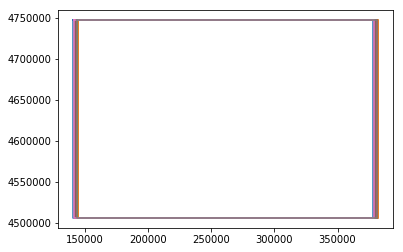

In [14]:
base = ["CORNER_{}_PROJECTION_".format(c) + "{}_PRODUCT"
        for c in ["UL", "UR", "LR", "LL", "UL"] ]
xs = [b.format("X") for b in base]
ys = [b.format("Y") for b in base]

for _, row in corners.iterrows():
    plt.plot(row[xs], row[ys])

In [15]:
im = Image.open(landsat_dir+"20170415_20180125_01_T1/LC08_L1TP_024031_20170415_20180125_01_T1_B3.TIF")
smaller = im.size
im = Image.open(landsat_dir+"20171008_20171023_01_T1/LC08_L1TP_024031_20171008_20171023_01_T1_B3.TIF")
larger = im.size

In [16]:
print(min(x_projection_sizes) / smaller[0])
print(max(x_projection_sizes) / larger[0])
print(min(y_projection_sizes) / smaller[1])
print(max(y_projection_sizes) / larger[1])

29.996212599419266
29.99621737485815
29.99626447515876
29.996269120756125


Image resolution is 30 m/px, so 1 projection_unit is 1 m, and
30 projection_units make 1 pixel.

Given the apparent yet unlikely 1 mm alignment resolution, hopefully these were carefully aligned and cropped.

Upper border is constant.

In [17]:
(max(corners["CORNER_LL_PROJECTION_X_PRODUCT"]))
min_offset = (min(corners["CORNER_LL_PROJECTION_X_PRODUCT"]))

corners["X_offset_meters"] = corners["CORNER_LL_PROJECTION_X_PRODUCT"] - min_offset
corners["X_offset_pixels"] = corners["X_offset_meters"] / 30

In [18]:
corners["X_offset_pixels"]

0      70.0
1     110.0
2      70.0
3      30.0
4      80.0
5     100.0
6      80.0
7     110.0
8      30.0
9      90.0
10      0.0
11    120.0
12     90.0
13     80.0
14     40.0
15     40.0
16     10.0
17    100.0
Name: X_offset_pixels, dtype: float64

Interestingly, pixel-perfect alignment was provided.

In [19]:
%%capture
metadata_df = corners[["X_offset_pixels"]]
dates = my_grep("DATE_ACQUIRED")
clouds = [float(c) for c in my_grep("CLOUD_COVER_LAND")]
metadata_df["DATE"] = pd.to_datetime(dates)
metadata_df["CLOUDS"] = clouds
metadata_df["PATH"] = [landsat_dir + p for p in timestamps]
metadata_df = metadata_df.sort_values(by="DATE")

#  Clouds

In [20]:
@np.vectorize
def adjust_gamma(value, gamma):
    inv_gamma = 1 / gamma
    return (value/255) ** inv_gamma * 255


CPU times: user 14.9 s, sys: 14.3 s, total: 29.1 s
Wall time: 1min 11s


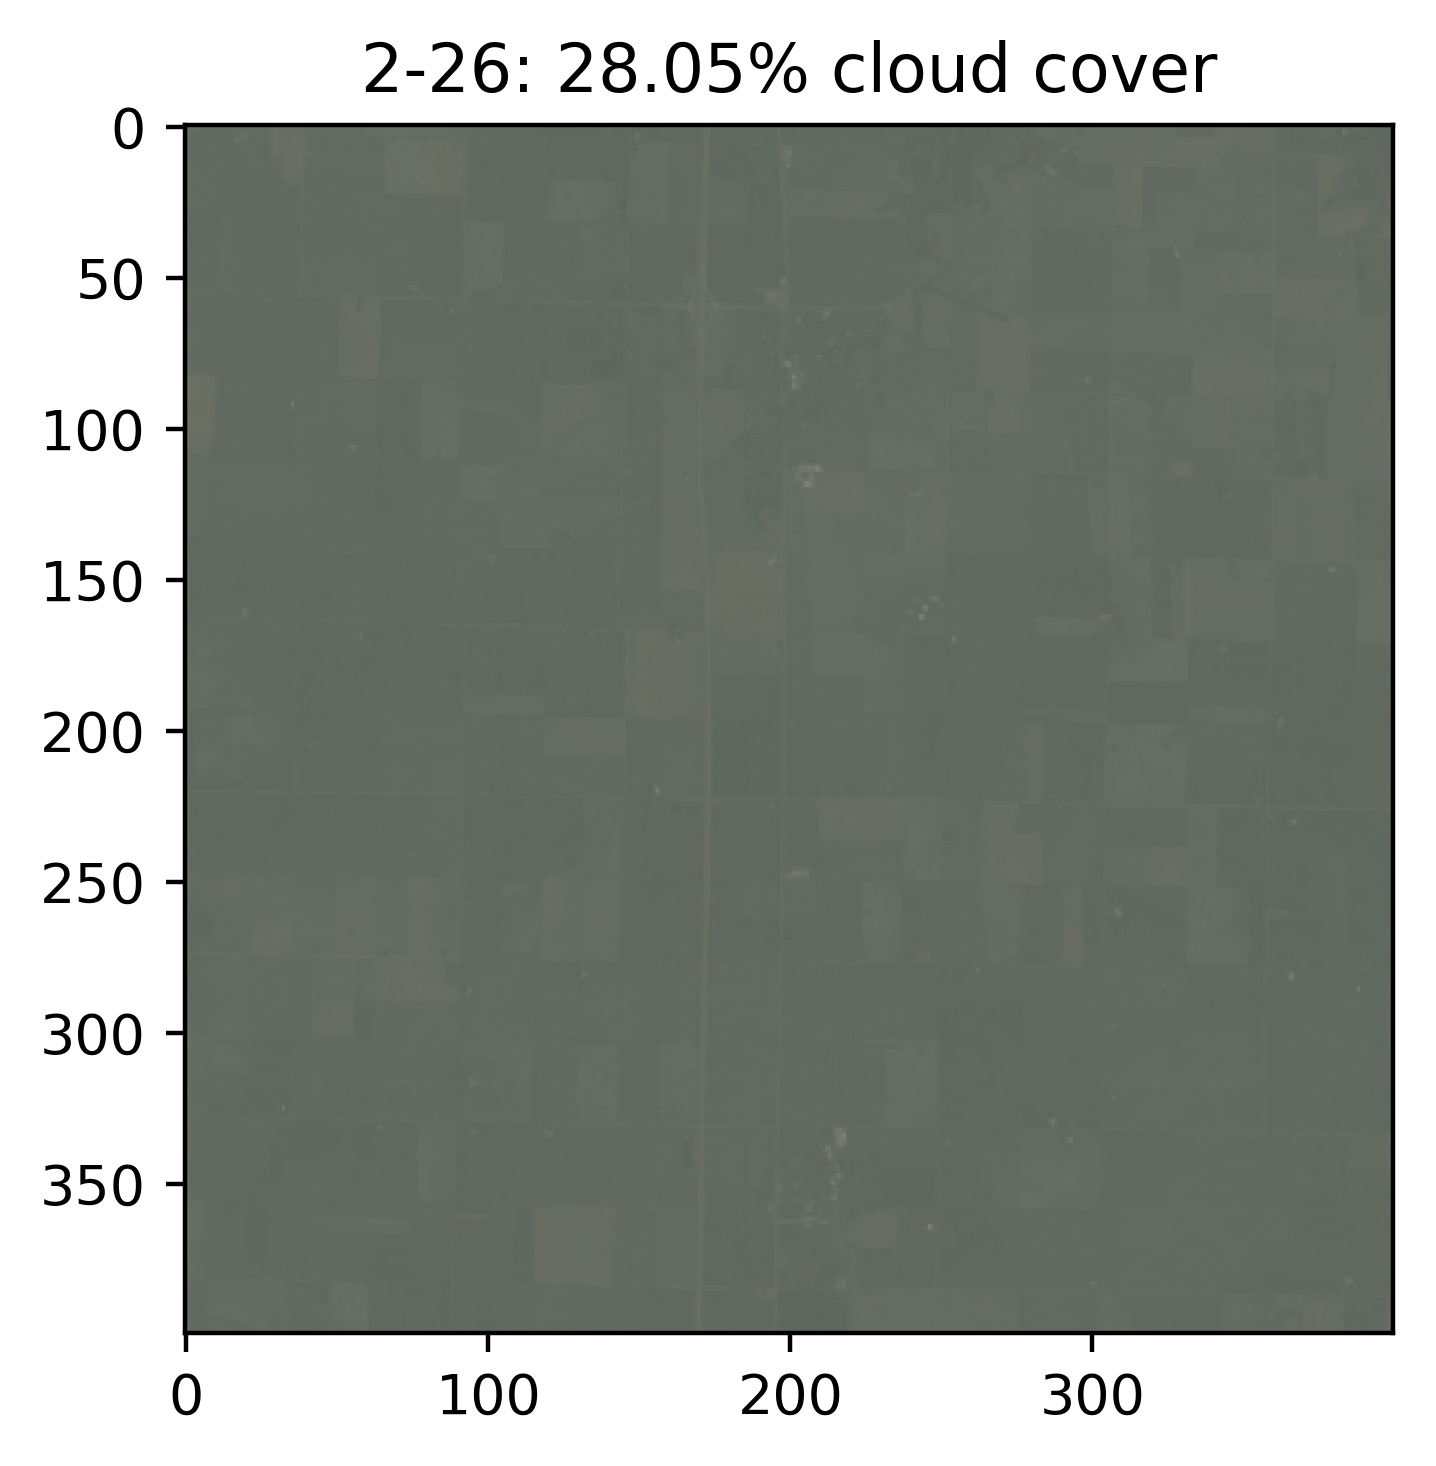

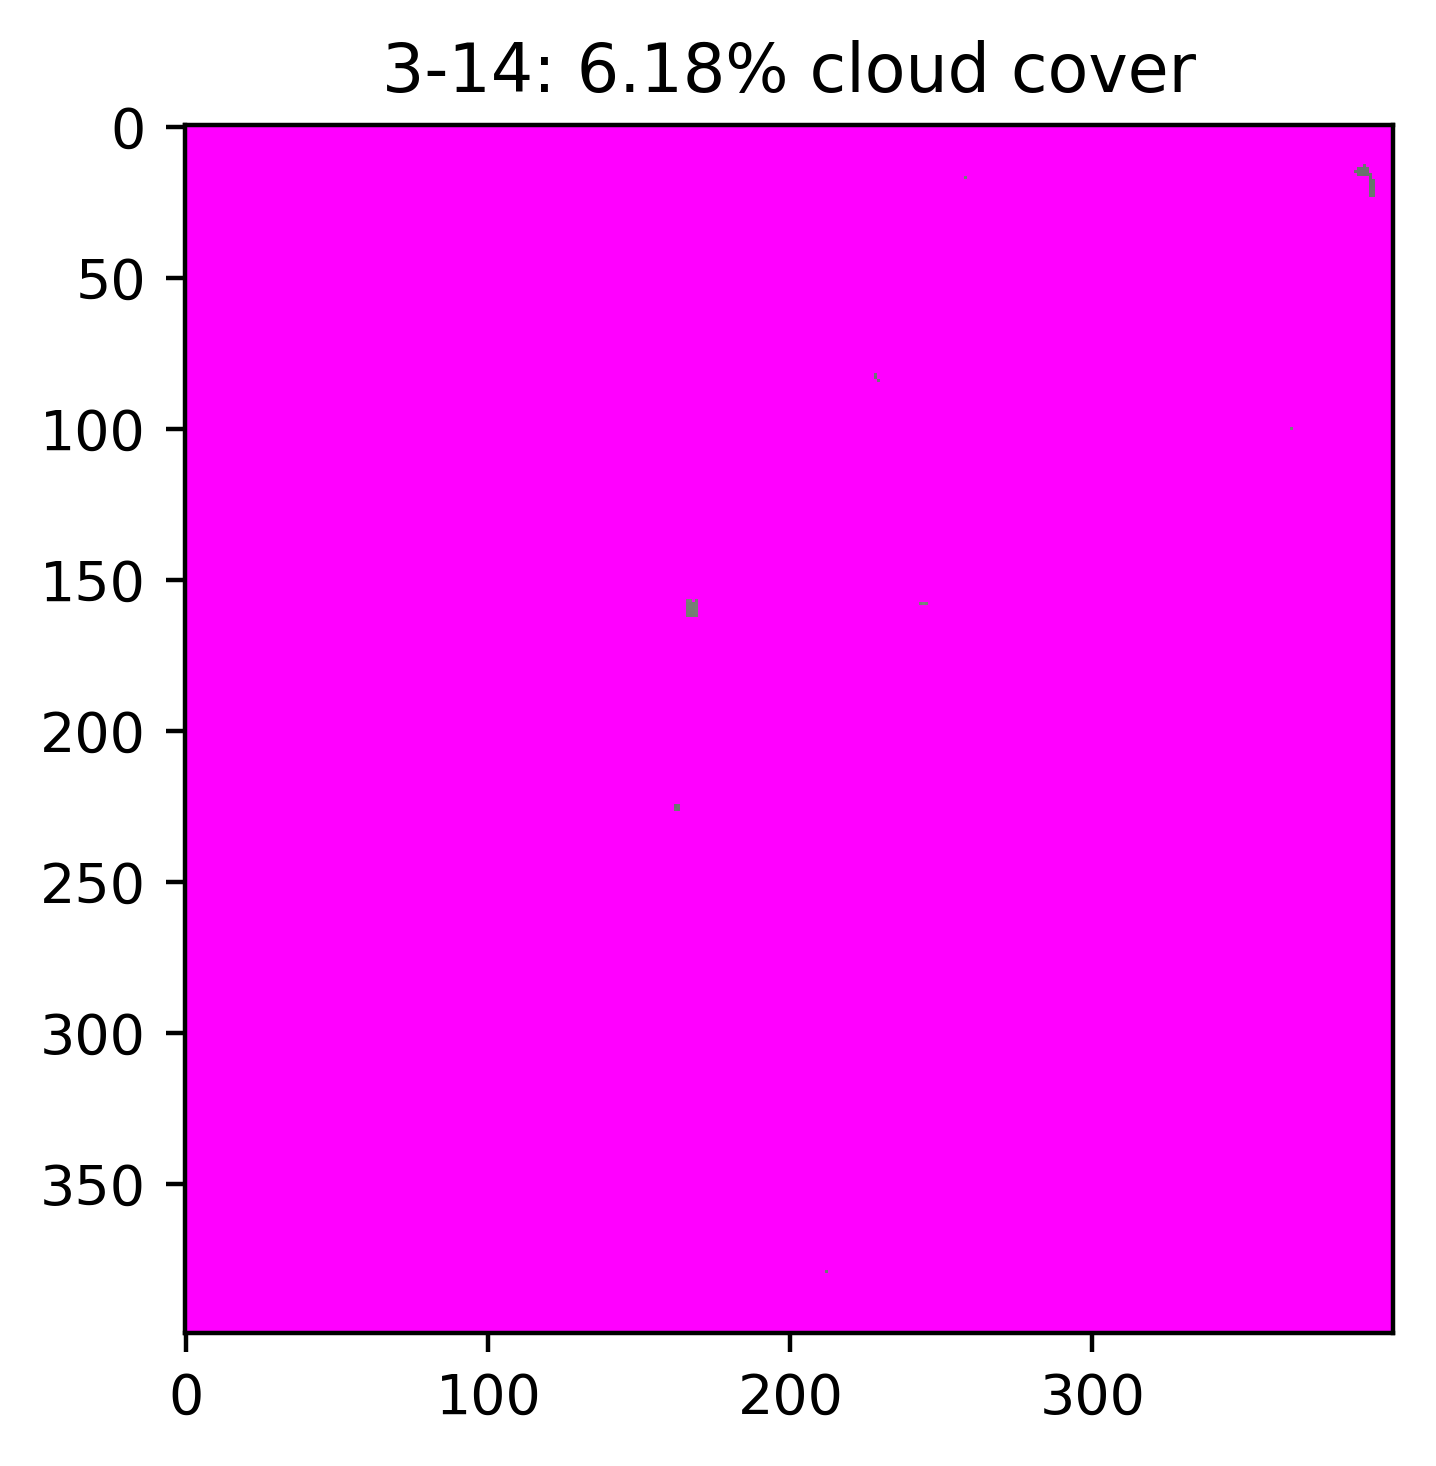

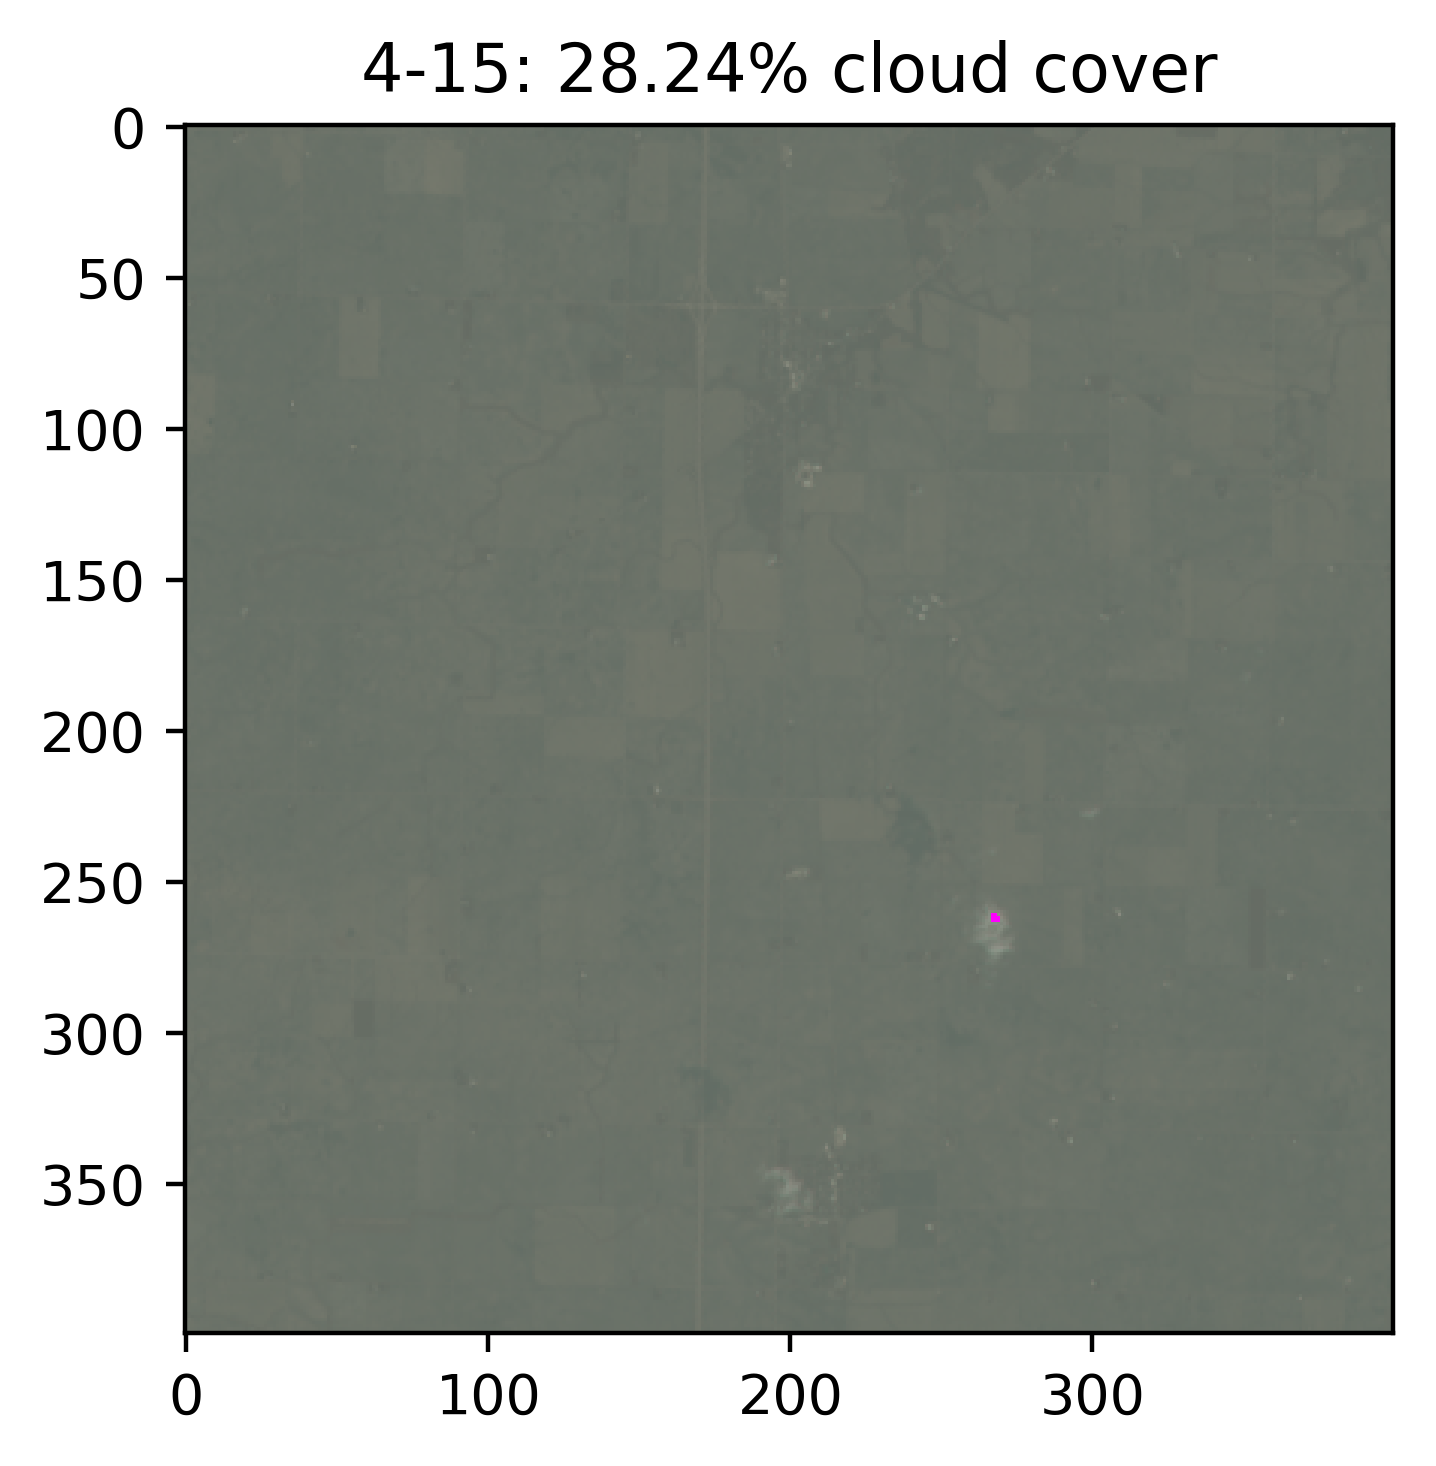

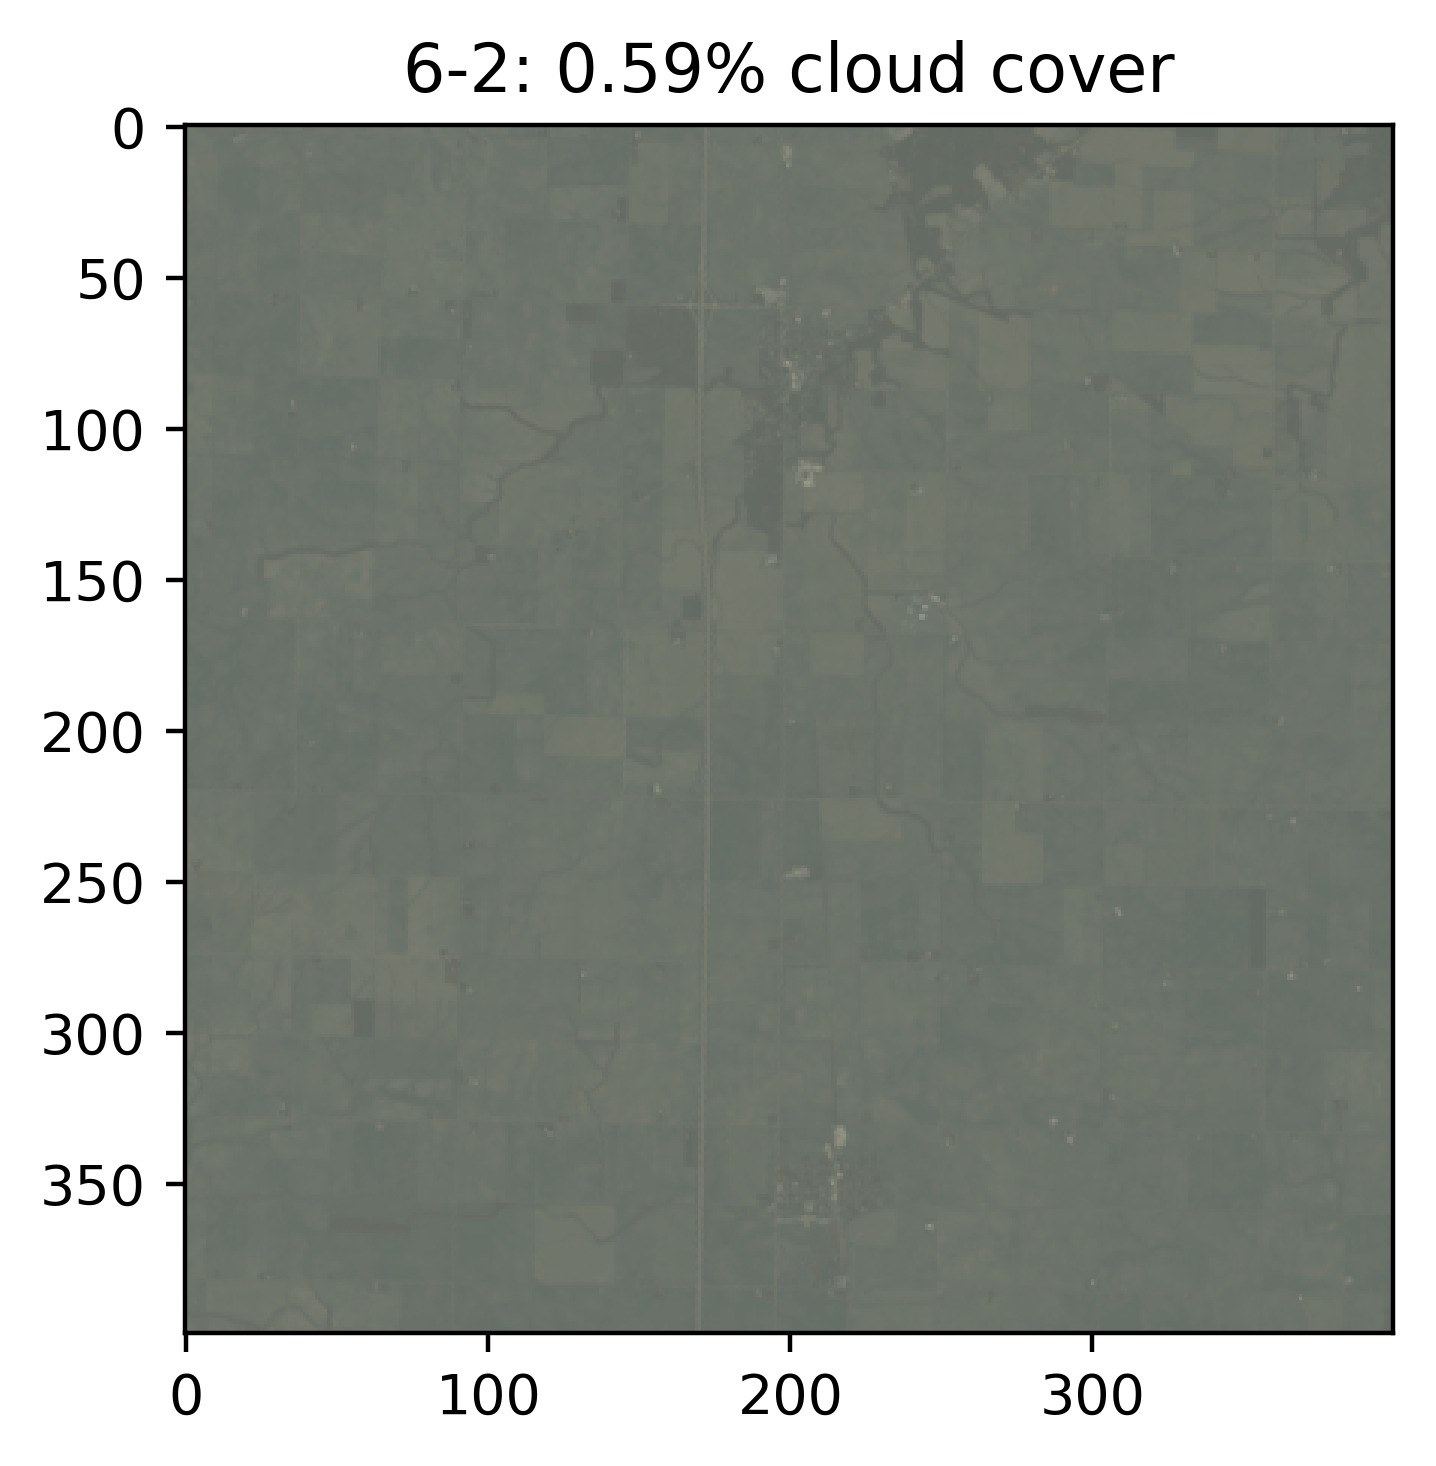

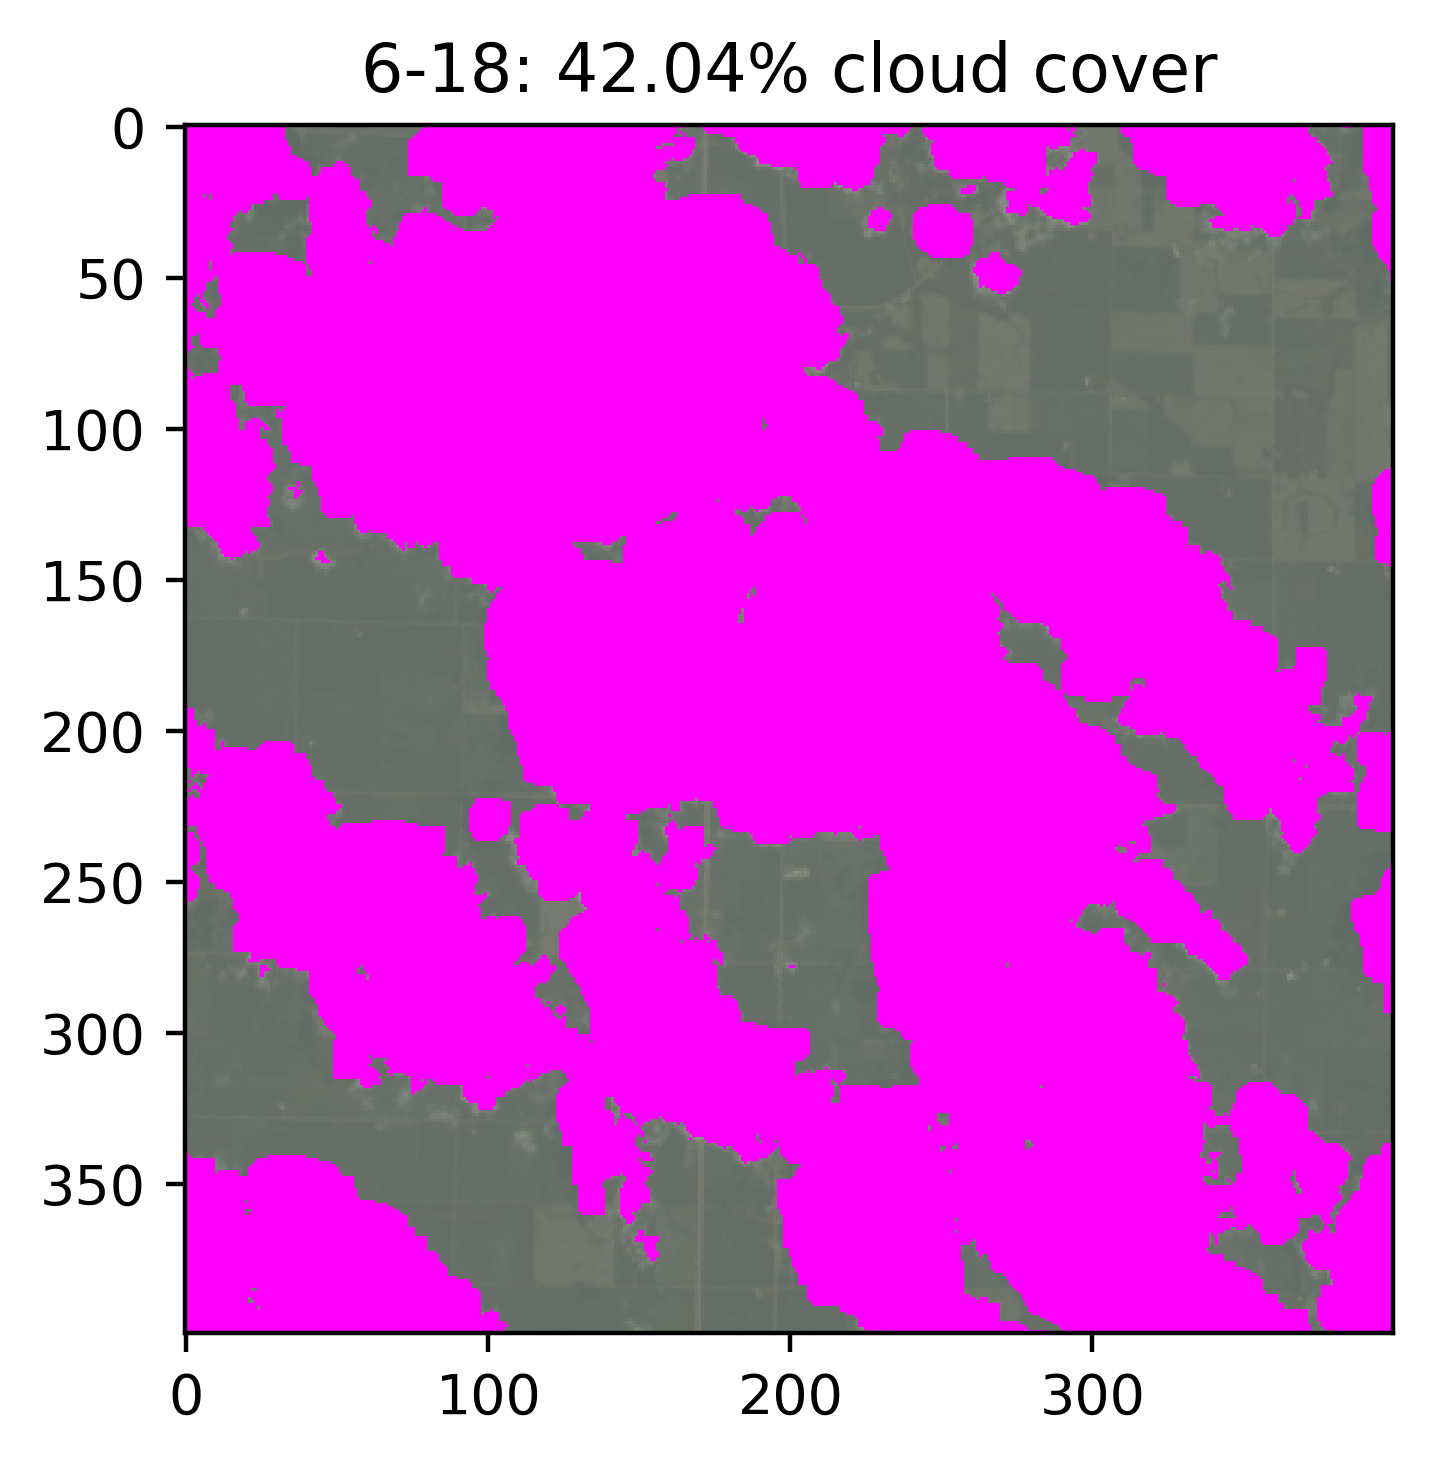

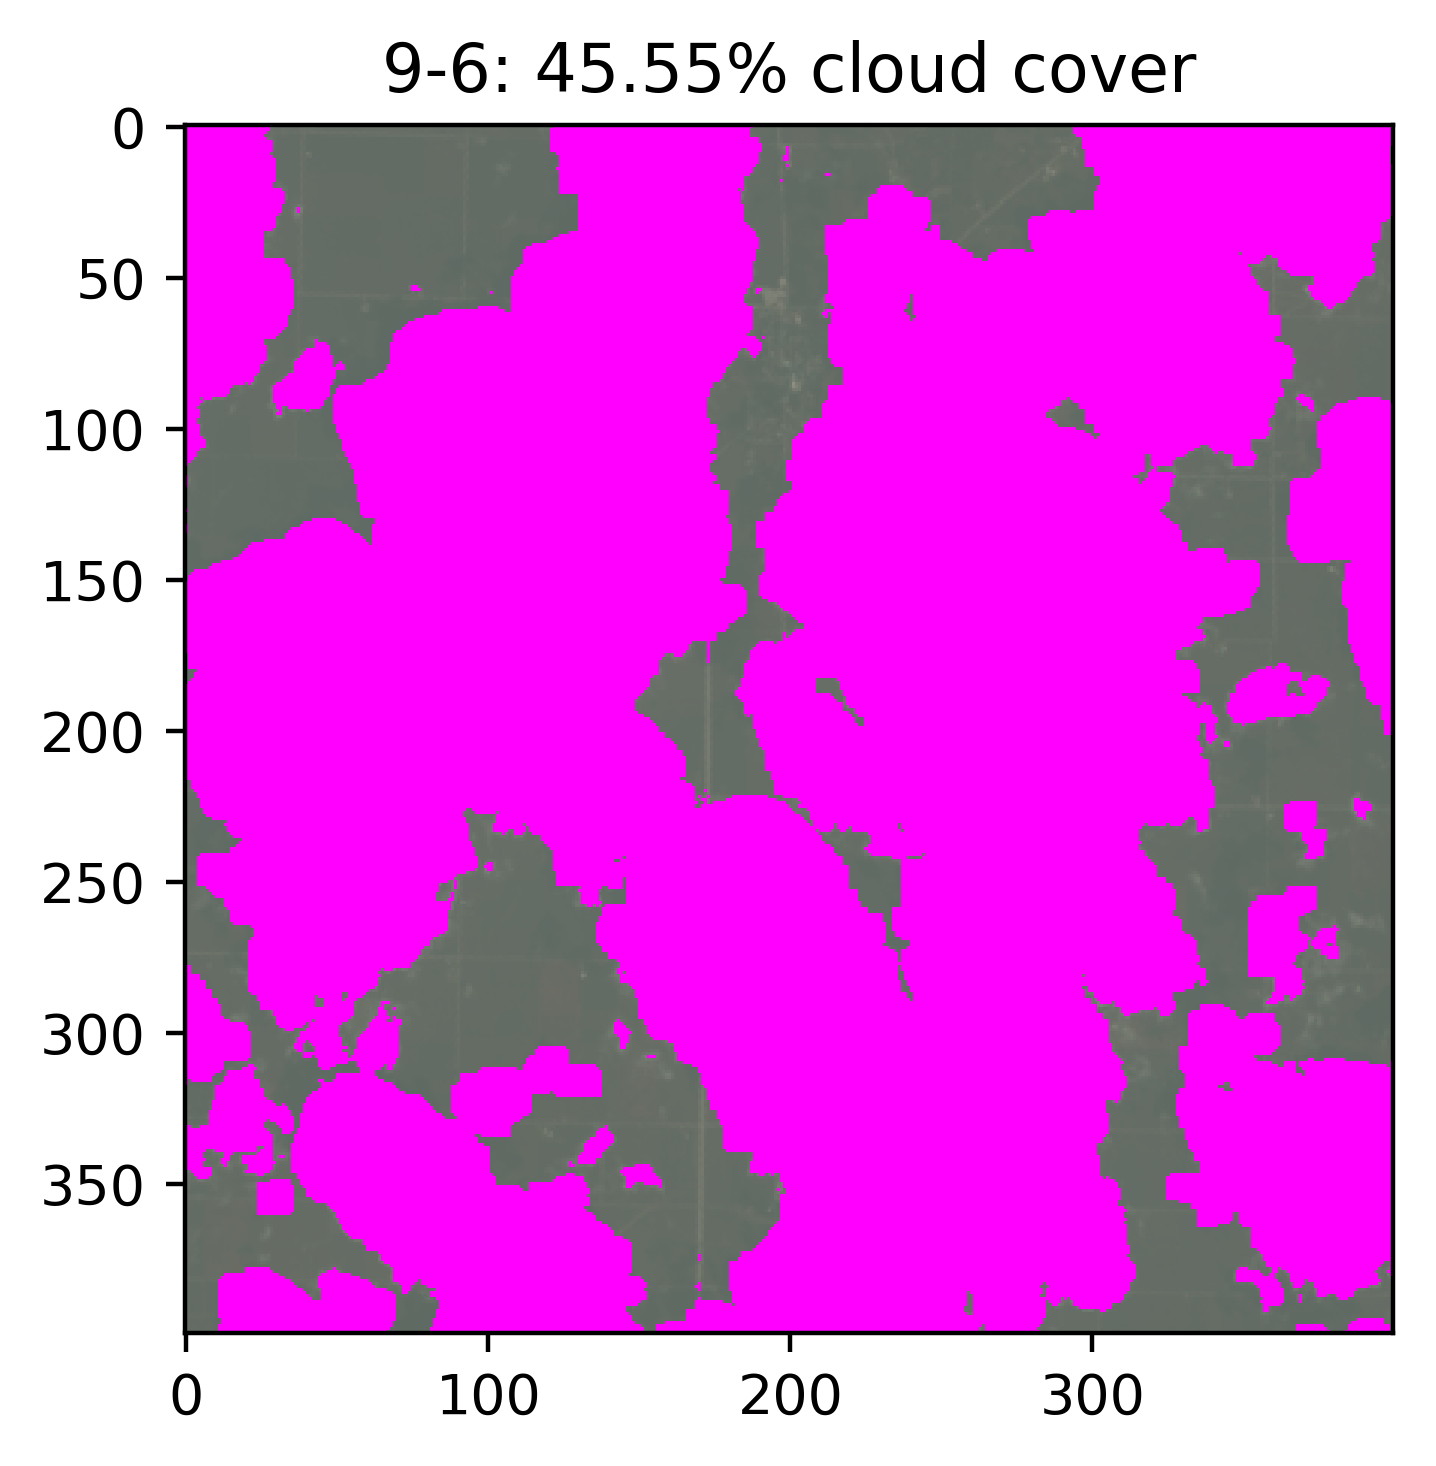

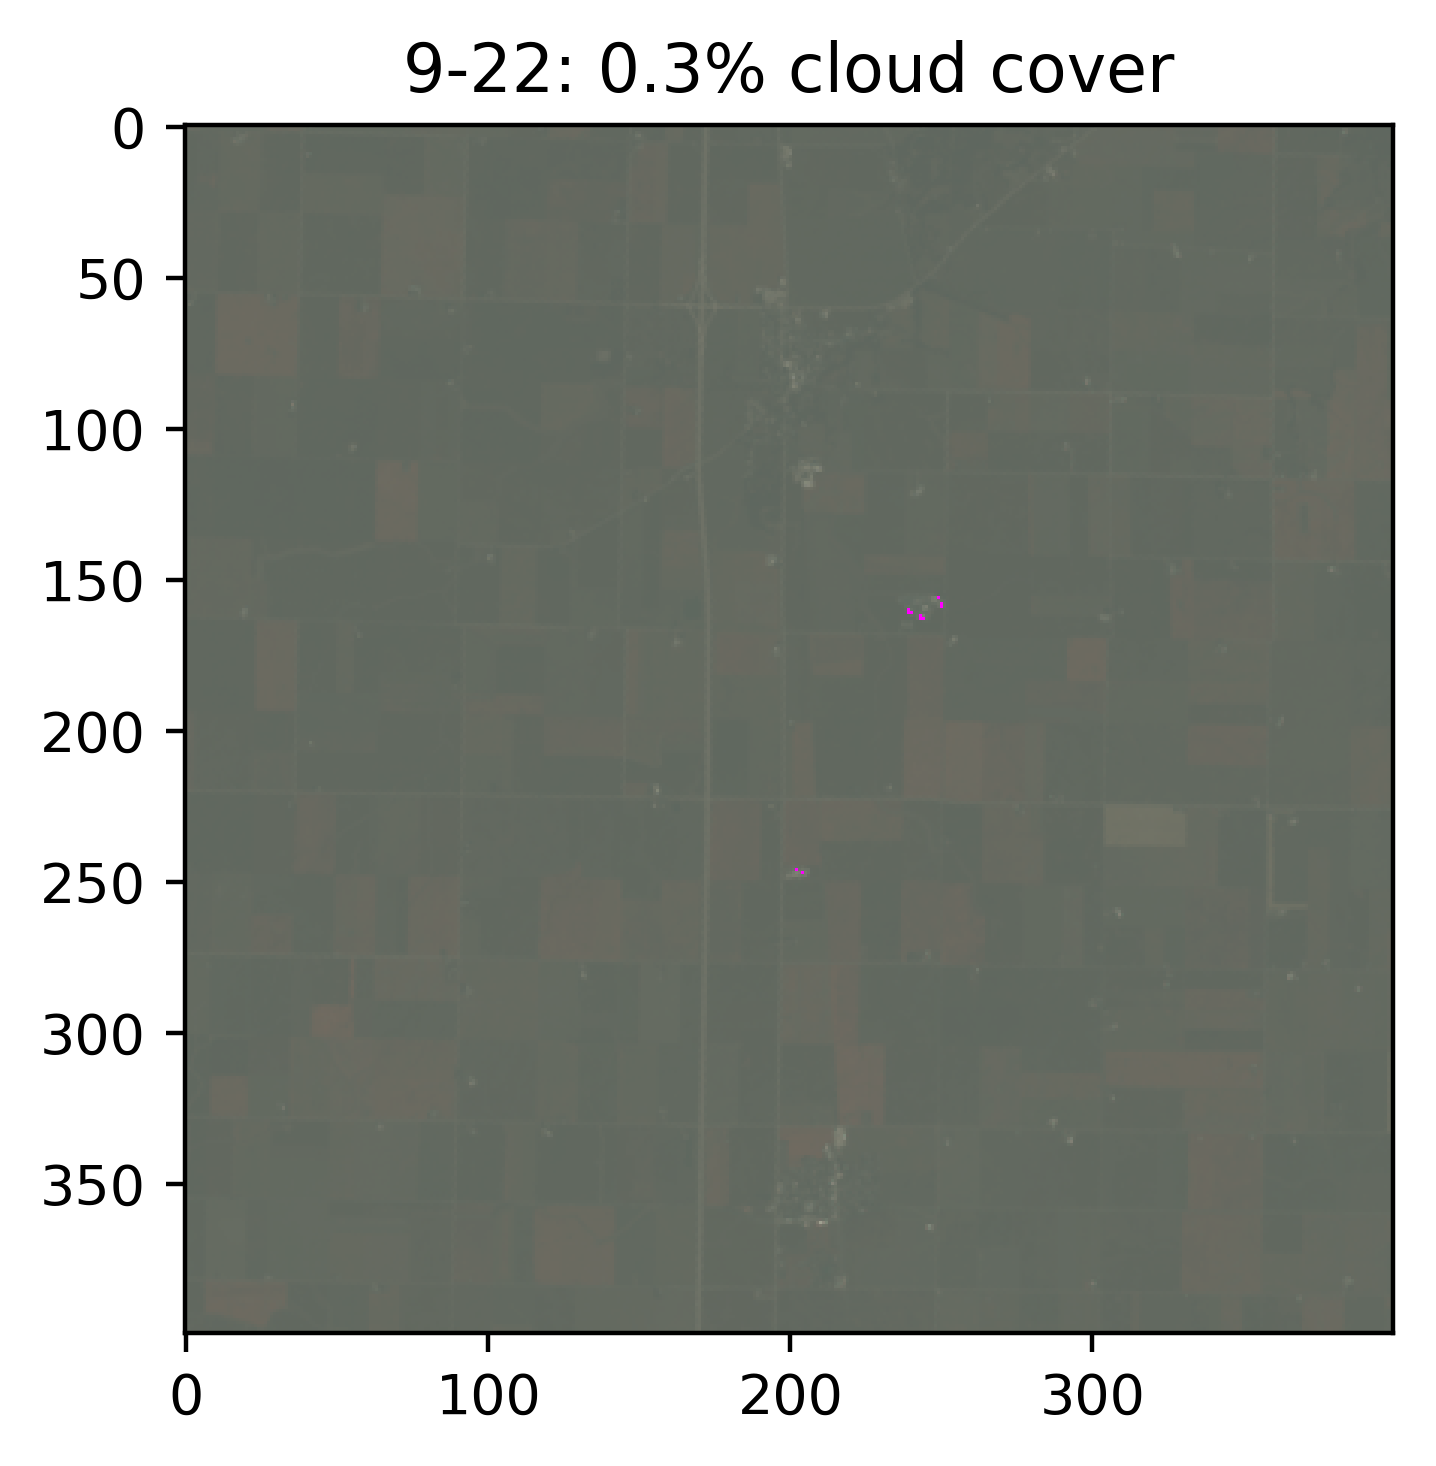

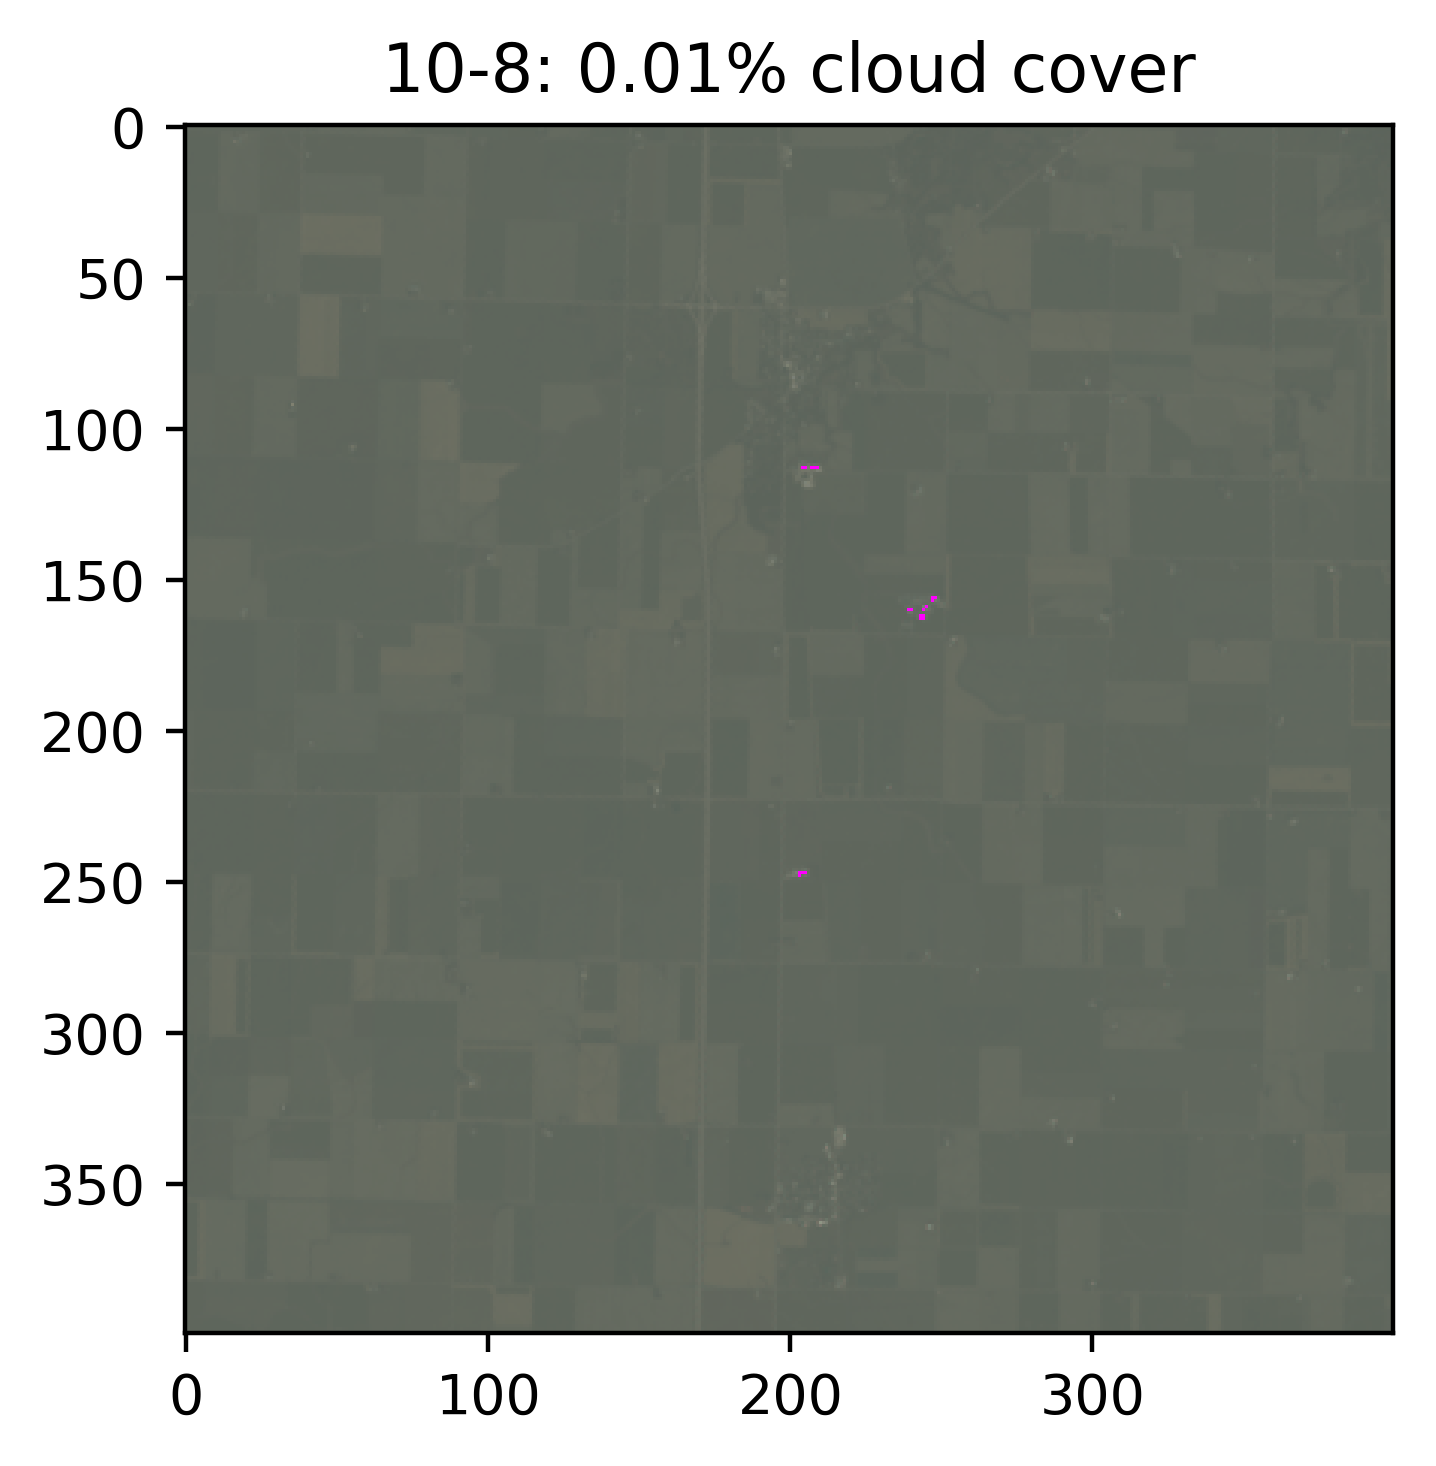

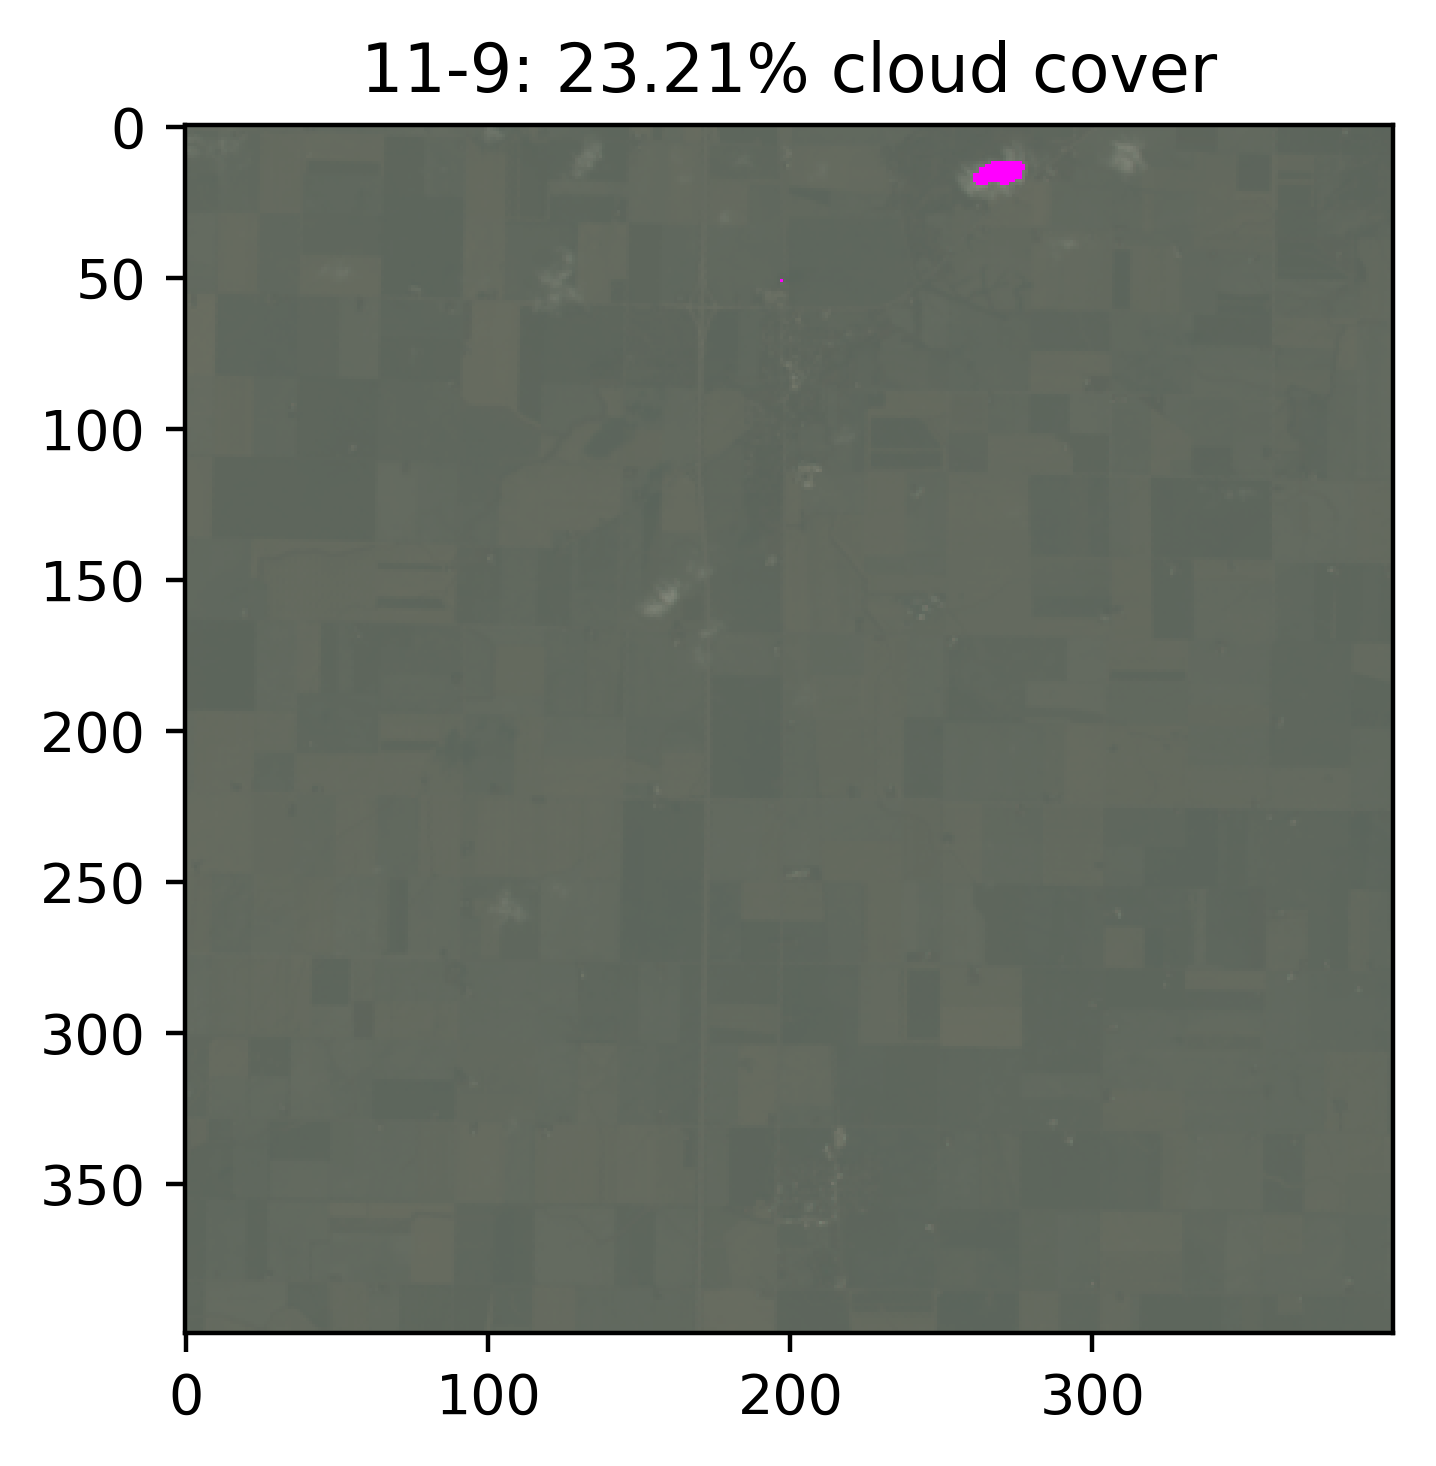

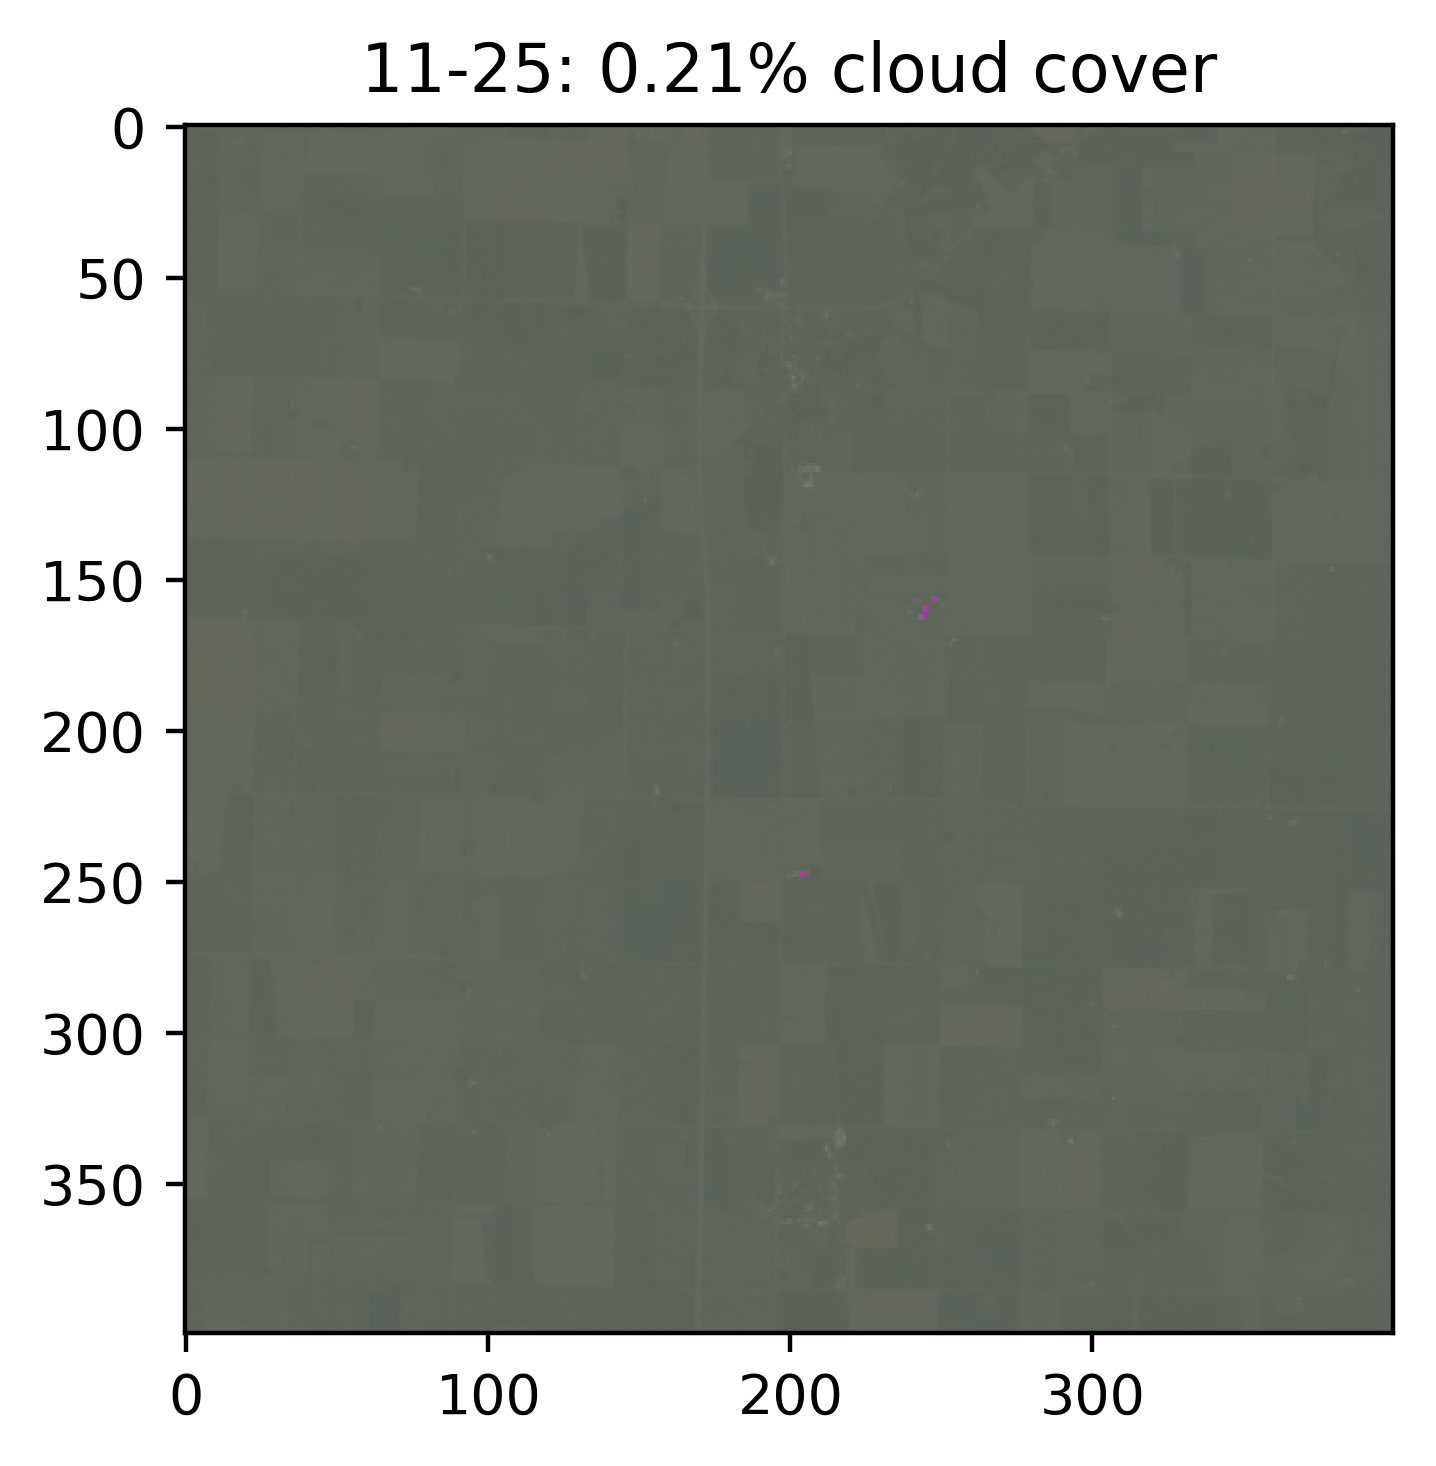

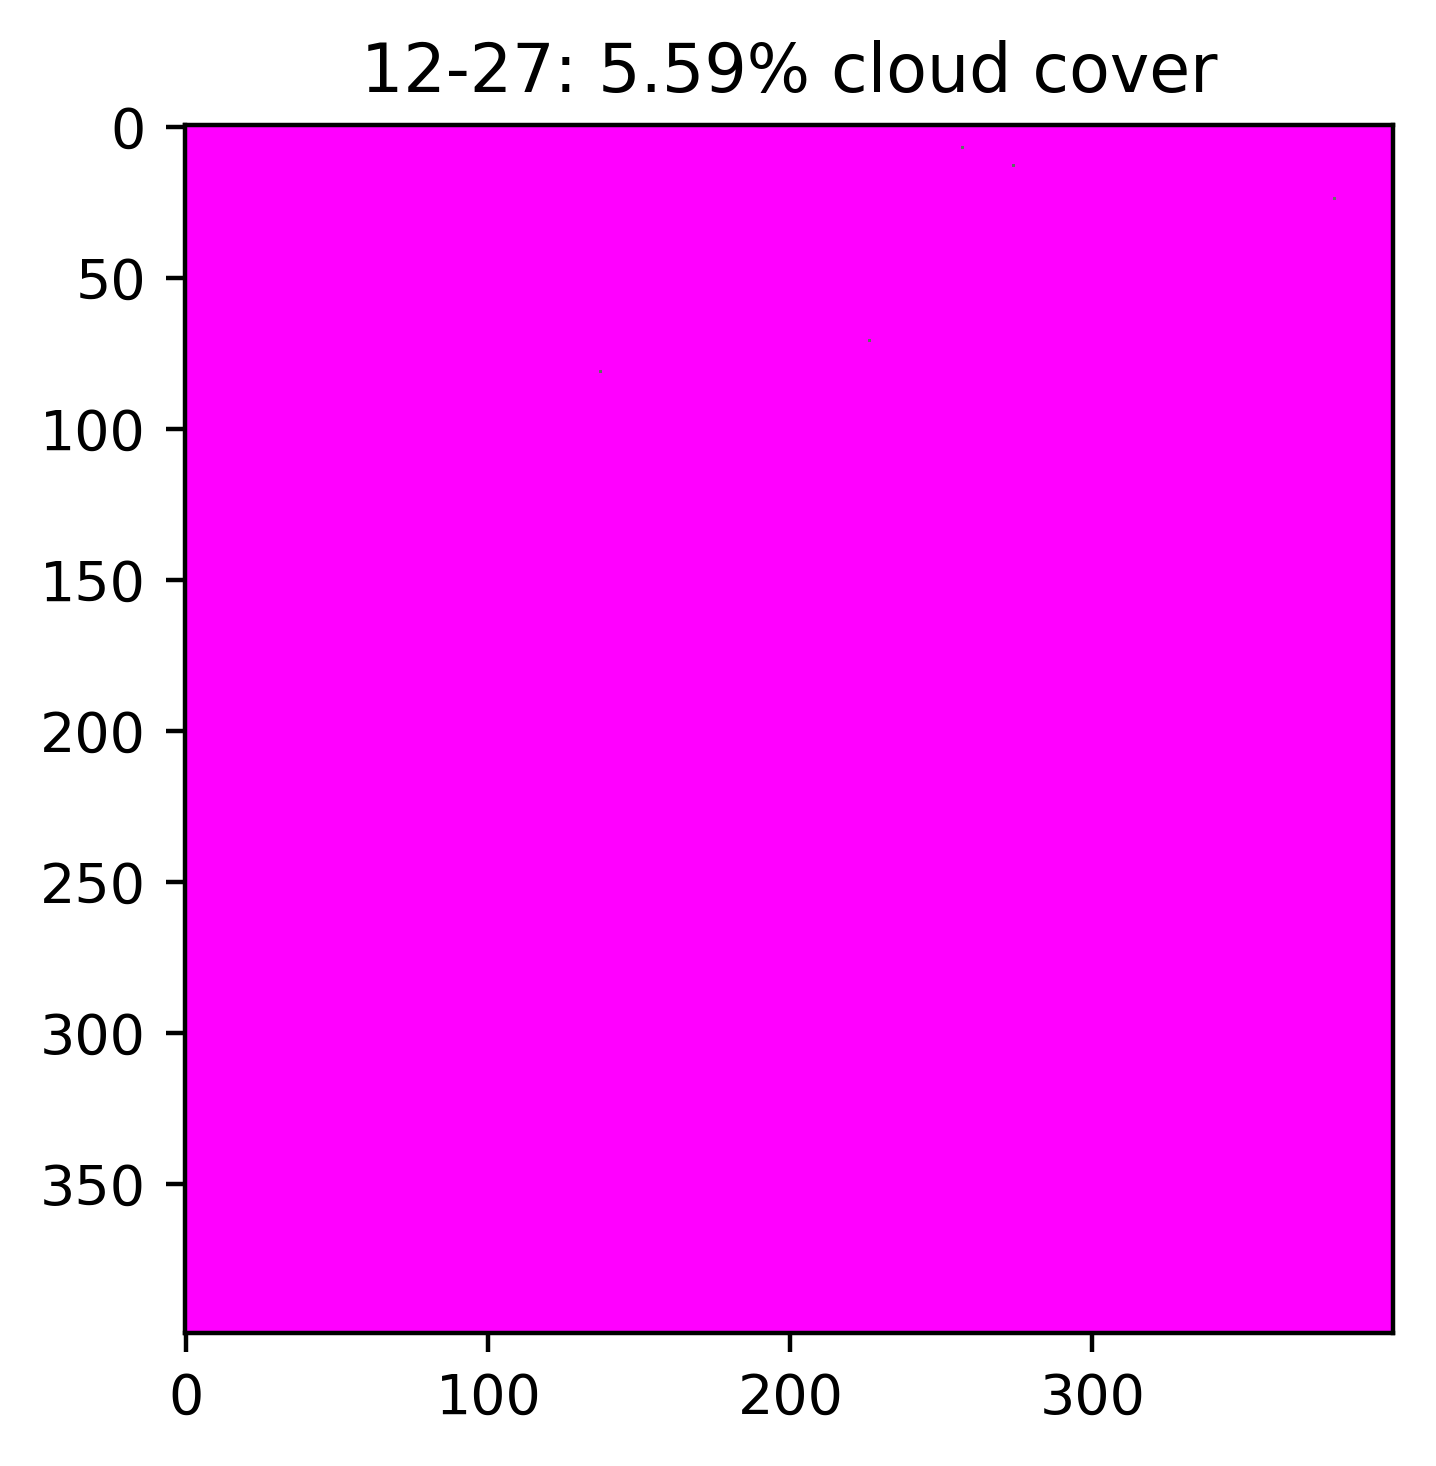

In [21]:
%%time
for _, row in metadata_df.iterrows():
    if row.CLOUDS > 50:
        continue
    ub = 6400
    lb = 6000
    delta = ub - lb
    band3_name = [b for b in os.listdir(row["PATH"]) if "B3" in b][0]
    path = row.PATH + "/" + band3_name.replace("B3", "B{}")
    y_lb = lb
    y_ub = ub
    x_lb = int(lb-row["X_offset_pixels"])
    x_ub = int(ub-row["X_offset_pixels"])
        
    im = Image.open(path.format(3))
    imarray = np.array(im).astype(float)
    reds = imarray[y_lb:y_ub, x_lb:x_ub]/255
    reds = adjust_gamma(reds, 2.2)
    
    im = Image.open(path.format(2))
    imarray = np.array(im).astype(float)
    greens = imarray[y_lb:y_ub, x_lb:x_ub]/255
    greens = adjust_gamma(greens, 2.3)
    
    im = Image.open(path.format(1))
    imarray = np.array(im).astype(float)
    blues = imarray[y_lb:y_ub, x_lb:x_ub]/255
    blues = adjust_gamma(blues, 2)
    
    quality_assessment_img = Image.open(path.format("QA"))
    quality_assessment_arr = np.array(quality_assessment_img)[y_lb:y_ub, x_lb:x_ub]
    acceptable_conditions = [2720, 2724, 2728, 2732]
    
    make_mask = np.vectorize(lambda x: x in acceptable_conditions)
    mask = make_mask(quality_assessment_arr)

    reds *= mask
    greens *= mask
    blues *= mask
    
    highlight_mask = np.vectorize(lambda x: 255 if x == 0 else x)
    reds = highlight_mask(reds)
    blues = highlight_mask(blues)

    plt.figure(dpi=400)
    plt.title("{}-{}: {}% cloud cover".format(row.DATE.month, row.DATE.day, row.CLOUDS))
    rgb_array = np.zeros((delta, delta,3), "uint8")
    rgb_array[..., 0] = reds
    rgb_array[..., 1] = greens
    rgb_array[..., 2] = blues
    
    plt.imshow(rgb_array);

CPU times: user 1.5 s, sys: 1.84 s, total: 3.34 s
Wall time: 4.57 s


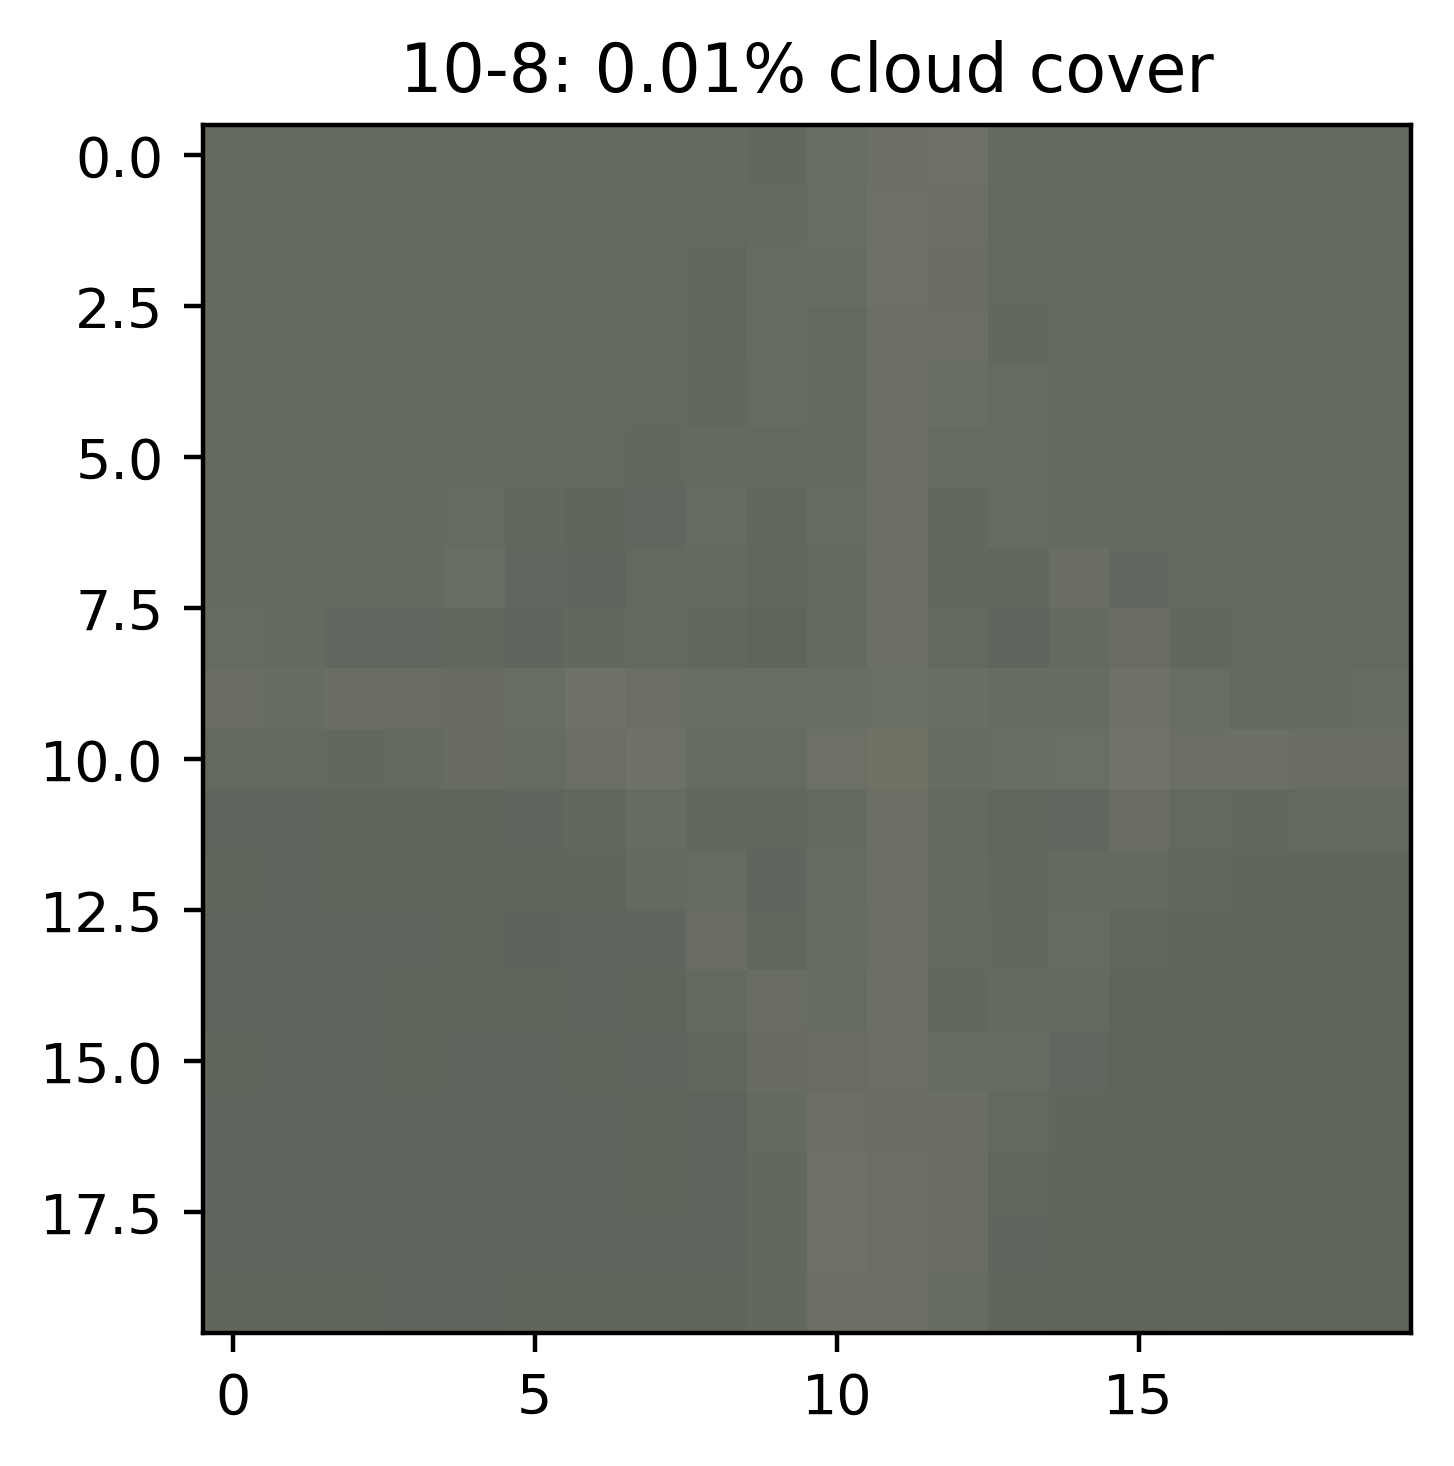

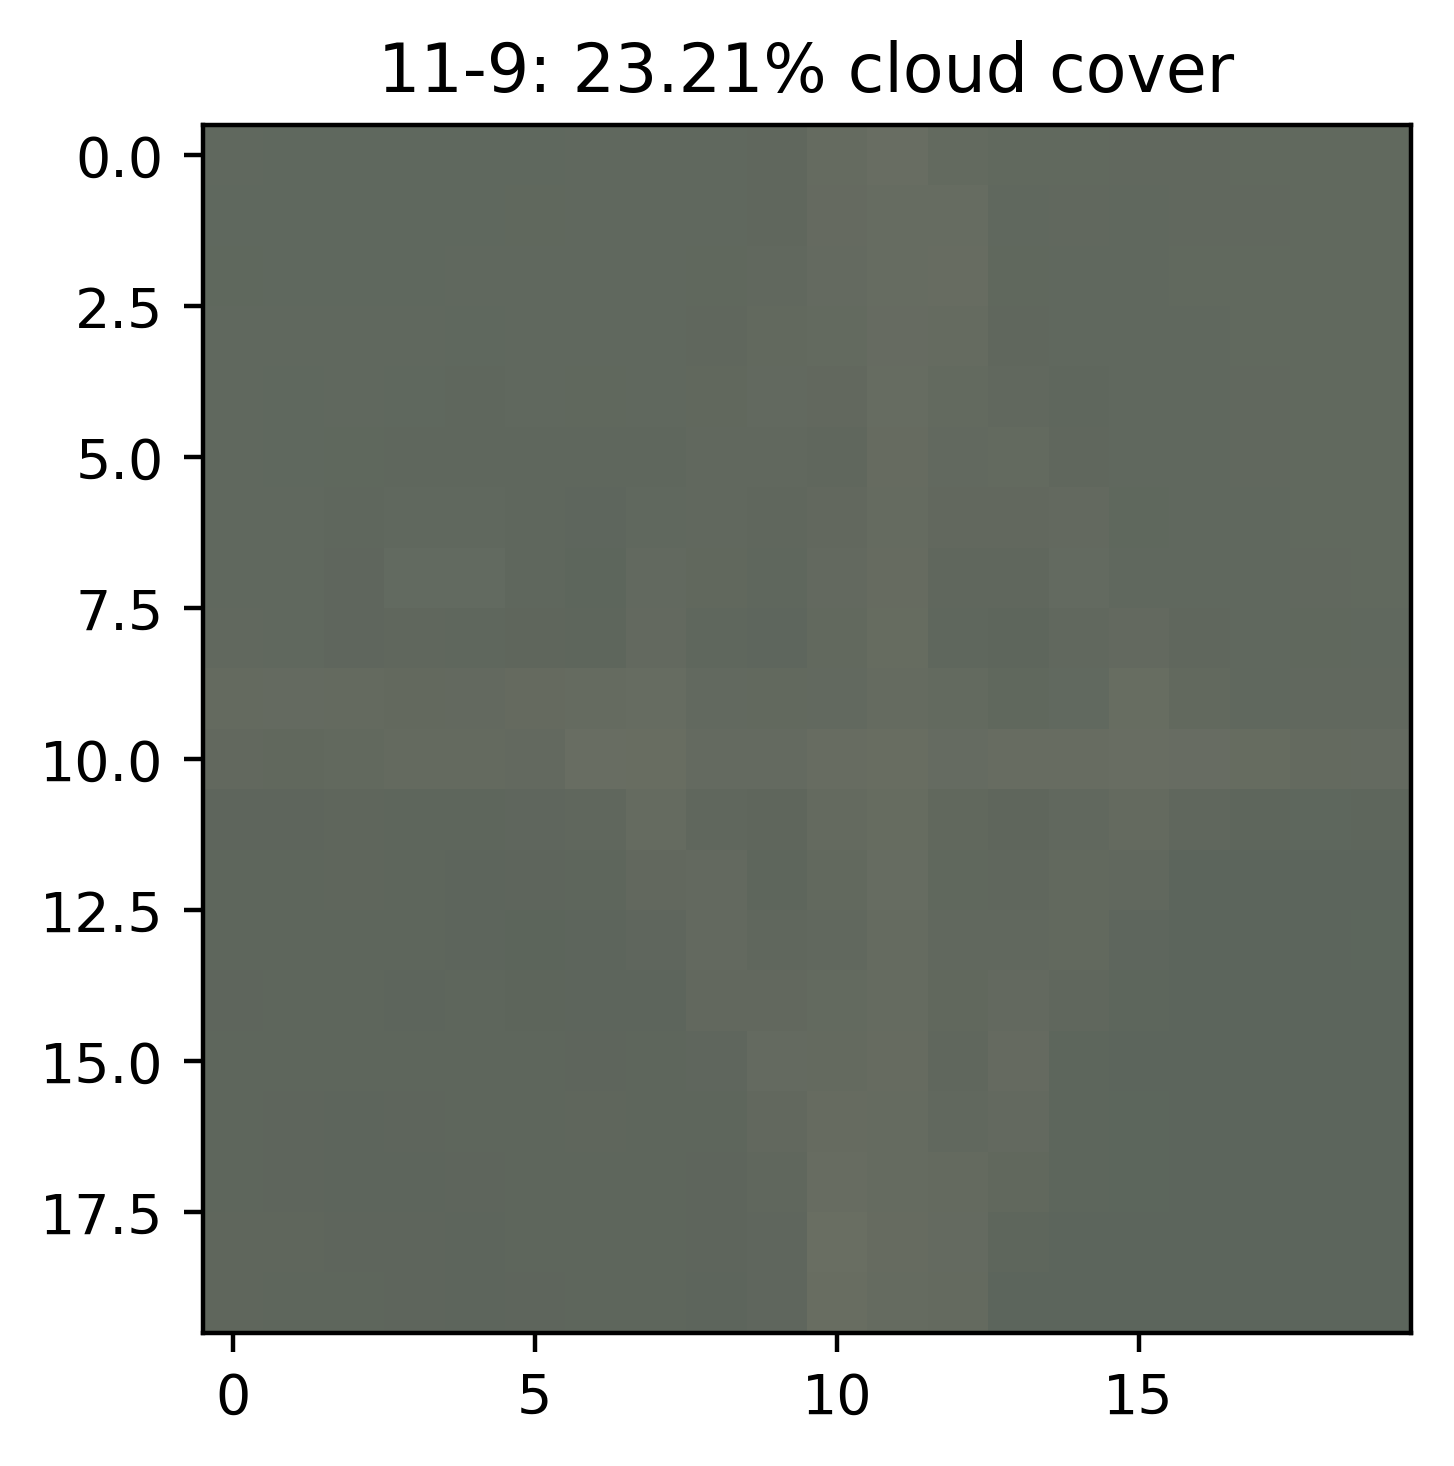

In [22]:
%%time
for _, row in metadata_df.iterrows():
    if row.X_offset_pixels != 30:
        continue
    ub = 6200
    lb = 6000
    band3_name = [b for b in os.listdir(row["PATH"]) if "B3" in b][0]
    path = row.PATH + "/" + band3_name.replace("B3", "B{}")
    y_lb = lb+50
    y_ub = ub-130
    y_delta = y_ub - y_lb
    x_lb = int(lb-row["X_offset_pixels"])+160
    x_ub = int(ub-row["X_offset_pixels"])-20
    x_delta = x_ub - x_lb
        
    im = Image.open(path.format(3))
    imarray = np.array(im).astype(float)
    reds = imarray[y_lb:y_ub, x_lb:x_ub]/255
    reds = adjust_gamma(reds, 2.2)
    
    im = Image.open(path.format(2))
    imarray = np.array(im).astype(float)
    greens = imarray[y_lb:y_ub, x_lb:x_ub]/255
    greens = adjust_gamma(greens, 2.3)
    
    im = Image.open(path.format(1))
    imarray = np.array(im).astype(float)
    blues = imarray[y_lb:y_ub, x_lb:x_ub]/255
    blues = adjust_gamma(blues, 2)
    
    qualitx_assessment_img = Image.open(path.format("QA"))
    qualitx_assessment_arr = np.array(qualitx_assessment_img)[y_lb:y_ub, x_lb:x_ub]
    acceptable_conditions = [2720, 2724, 2728, 2732]
    
    make_mask = np.vectorize(lambda x: x in acceptable_conditions)
    mask = make_mask(qualitx_assessment_arr)

    reds *= mask
    greens *= mask
    blues *= mask
    
    highlight_mask = np.vectorize(lambda x: 255 if x == 0 else x)
    reds = highlight_mask(reds)
    blues = highlight_mask(blues)

    plt.figure(dpi=400)
    plt.title("{}-{}: {}% cloud cover".format(row.DATE.month, row.DATE.day, row.CLOUDS))
    rgb_array = np.zeros((y_delta, x_delta,3), "uint8")
    rgb_array[..., 0] = reds
    rgb_array[..., 1] = greens
    rgb_array[..., 2] = blues
    
    plt.imshow(rgb_array);

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

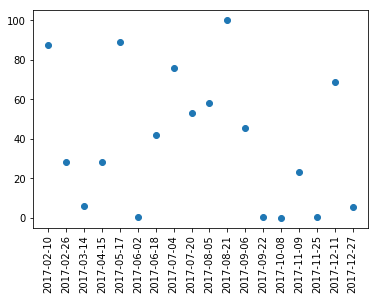

In [23]:
plt.plot(dates, clouds, "o")
plt.xticks(rotation=90)

In [24]:
my_grep("SCENE_CENTER_TIME")

data/landsat-8/024031/20171211_20171223_01_T1/
    SCENE_CENTER_TIME = "16:41:25.8899350Z"
data/landsat-8/024031/20170517_20170525_01_T1/
    SCENE_CENTER_TIME = "16:40:44.2509170Z"
data/landsat-8/024031/20170210_20170217_01_T1/
    SCENE_CENTER_TIME = "16:41:14.0912840Z"
data/landsat-8/024031/20171109_20171121_01_T1/
    SCENE_CENTER_TIME = "16:41:33.0857000Z"
data/landsat-8/024031/20170922_20171012_01_T1/
    SCENE_CENTER_TIME = "16:41:27.2054139Z"
data/landsat-8/024031/20170906_20170917_01_T1/
    SCENE_CENTER_TIME = "16:41:23.3358899Z"
data/landsat-8/024031/20171125_20171206_01_T1/
    SCENE_CENTER_TIME = "16:41:27.3261590Z"
data/landsat-8/024031/20170704_20170716_01_T1/
    SCENE_CENTER_TIME = "16:41:04.0002600Z"
data/landsat-8/024031/20171008_20171023_01_T1/
    SCENE_CENTER_TIME = "16:41:32.9595079Z"
data/landsat-8/024031/20170618_20180125_01_T1/
    SCENE_CENTER_TIME = "16:41:00.1431600Z"
data/landsat-8/024031/20170415_20180125_01_T1/
    SCENE_CENTER_TIME = "16:40:43.8107420Z"

['"16:41:25.8899350Z"',
 '"16:40:44.2509170Z"',
 '"16:41:14.0912840Z"',
 '"16:41:33.0857000Z"',
 '"16:41:27.2054139Z"',
 '"16:41:23.3358899Z"',
 '"16:41:27.3261590Z"',
 '"16:41:04.0002600Z"',
 '"16:41:32.9595079Z"',
 '"16:41:00.1431600Z"',
 '"16:40:43.8107420Z"',
 '"16:41:09.0633500Z"',
 '"16:41:21.2338810Z"',
 '"16:40:53.6788620Z"',
 '"16:41:09.1310210Z"',
 '"16:41:00.4777989Z"',
 '"16:41:27.2744800Z"',
 '"16:41:16.3252389Z"']

In [ ]:
kk